# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 1381 Исайкин Георгий Иванович и Петров Александр Сергеевич. Вариант №4.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

### Дискретный рекурсивный фильтр
Это фильтр, который вычисляет выходной сигнал в момент времени $y_n$ с использованием предыдущих выходных значений по следующей формуле:
$$y_n = \sum_{k=0}^{N-1} b_k x_{n-k} + \sum_{k=1}^{M} a_k y_{n-k}$$
Где:
- $y_i$ — выходной сигнал в момент времени $i$;
- $x_i$ — входной сигнал в момент времени $i$;
- $b_k$ — коэффициенты, определяющие влияние входного сигнала;
- $a_k$ — коэффициенты, определяющие влияние предыдущих выходных значений;
- $N$ — количество коэффициентов для входного сигнала;
- $M$ — количество коэффициентов для выходного сигнала.

### Квадратурные формулы
Это формулы фильтров для численного интегрирования выходного сигнала $y_n$. В работе применяются следующие формулы:
- **Формула прямоугольников:**
$$y_{n+1}=y_n+x_{n+\frac12},~y_0=0$$

- **Формула трапеций:**
$$y_{n+1}=y_n+\frac12(x_n+x_{n+1}),~y_0=0$$

- **Формула Симпсона:**
$$y_{n+1}=y_n+\frac13(x_{n-1}+4x_n+x_{n+1}),~y_0=0$$

где $x_n$ - входной сигнал в момент времени $n$.

### Правило 3/8
Это формула фильтра для численного интегрирования выходного сигнала $y_n$ по формуле:
$$y_{n+2} = y_{n-1} + \frac1{8}(x_{n+2}+3x_{n+1}+3x_{n}+x_{n-1})$$

где $x_n$ - входной сигнал в момент времени $n$.


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул. 

## Выполнение работы

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Задание 1
Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

#### Формула прямоугольников
Выходной сигнал:
$$y_{n+1}=y_n+x_{n+\frac12},~y_0=0$$
где $x_n$ - входной сигнал.

Так как $H=\frac{y_n}{x_n}$ то получается, что $y_n=H\cdot x_n$
Соответственно формулу можно записать в виде следующей системы:
$$\begin{cases} y_{n+1}=H\cdot x_n+x_{n+\frac12} \\ y_{n+1}=H \cdot x_{n+1} \end{cases}$$

Получаем, что при $x_n=\exp(i\omega n)$ (гармонический ряд):
$$\begin{cases} y_{n+1}=H(\omega)\exp(i \omega n)+\exp(i\omega (n+\frac12)) \\ y_{n+1}=H(\omega)\exp(i \omega (n+1)) \end{cases}\Rightarrow H(\omega)\exp(i \omega n)+\exp(i\omega (n+\frac12)) = H(\omega)\exp(i \omega (n+1)) \Rightarrow$$
$$\Rightarrow H(\omega)\exp(i\omega n)(exp(i\omega)-1)=\exp(i\omega n)\exp(\frac12i\omega)\Rightarrow H(\omega)(exp(i\omega)-1)=\exp(\frac12i\omega) \Rightarrow$$
$$\Rightarrow H(\omega)=\frac{\exp(\frac12i\omega)}{\exp(i\omega)-1}=\frac1{\exp(\frac12i\omega)-\exp(-\frac12i\omega)}=\frac1{2i\sin(\frac12\omega)}$$

Переведём в циклическую частоту и получим:
$$\tilde H(f)=\frac1{2i\sin(\pi f)}$$

Истинное значение можно посчитать как $\int x_ndn$. Для гармоничного сигнала получаем $\frac{\exp(i\omega n)}{i\omega}$. Следственно отношения вычисляемого в результате фильтрации значения к истинному считается следующим образом:
$$\frac{i\omega\cdot y_n}{x_n}=2i\pi f\cdot \tilde H(f)=\frac{\pi f}{\sin(\pi f)}$$

#### Формула трапеций
Выходной сигнал:
$$y_{n+1}=y_n+\frac12(x_n+x_{n+1}),~y_0=0$$
где $x_n$ - входной сигнал.

Формулу можно записать в виде следующей системы:
$$\begin{cases} y_{n+1}=H \cdot x_n+\frac12(x_n+x_{n+1}) \\ y_{n+1}=H \cdot x_{n+1} \end{cases}$$

Получаем, что при $x_n=\exp(i\omega n)$ (гармонический ряд):
$$\begin{cases} y_{n+1}=H(\omega)\exp(i \omega n)+\frac12\left(\exp(i\omega n) + \exp(i\omega(n+1))\right) \\ y_{n+1}=H(\omega)\exp(i \omega (n+1)) \end{cases}\Rightarrow$$
$$\Rightarrow H(\omega)\exp(i\omega n)(exp(i\omega)-1)=\frac12\exp(i\omega n)(1+\exp(i\omega))\Rightarrow H(\omega)(exp(i\omega)-1)=\frac12(1+\exp(i\omega)) \Rightarrow$$
$$\Rightarrow H(\omega)=\frac12\cdot\frac{1+\exp(i\omega)}{\exp(i\omega)-1}=\frac12\cdot\frac{\exp(\frac12i\omega)+\exp(-\frac12i\omega)}{\exp(\frac12i\omega)-\exp(-\frac12i\omega)}=\frac{\cos(\frac12\omega)}{2i\sin(\frac12\omega)}$$

Переведём в циклическую частоту и получим:
$$\tilde H(f)=\frac{\cos(\pi f)}{2i\sin(\pi f)}$$

Отношения вычисляемого в результате фильтрации значения к истинному следующее:
$$2i\pi f\cdot \tilde H(f)=\pi f\frac{\cos(\pi f)}{\sin(\pi f)}$$

#### Формула Симпсона
Выходной сигнал:
$$y_{n+1}=y_n+\frac13(x_{n-1}+4x_n+x_{n+1}),~y_0=0$$
где $x_n$ - входной сигнал.

Формулу можно записать в виде следующей системы:
$$\begin{cases} y_{n+1}=H \cdot x_n+\frac13(x_{n-1}+4x_n+x_{n+1}) \\ y_{n+1}=H \cdot x_{n+1} \end{cases}$$

Получаем, что при $x_n=\exp(i\omega n)$ (гармонический ряд):
$$\begin{cases} y_{n+1}=H(\omega)\exp(i \omega n)+\frac13\left(\exp(i\omega(n-1))+4\exp(i\omega n)+\exp(i\omega(n+1))\right) \\ y_{n+1}=H(\omega)\exp(i \omega (n+1)) \end{cases}\Rightarrow$$
$$\Rightarrow H(\omega)\exp(i\omega n)(exp(i\omega)-1)=\frac13\exp(i\omega n)(\exp(-i\omega)+4+\exp(i\omega))\Rightarrow H(\omega)(exp(i\omega)-1)=\frac13(\exp(-i\omega)+4+\exp(i\omega)) \Rightarrow$$
$$\Rightarrow H(\omega)=\frac13\cdot\frac{\exp(-i\omega)+4+\exp(i\omega)}{\exp(i\omega)-1}=\frac{\cos(\omega)+2}{3i\sin(\omega)}$$

Переведём в циклическую частоту и получим:
$$\tilde H(f)=\frac{\cos(2\pi f)+2}{3i\sin(2\pi f)}$$

Отношения вычисляемого в результате фильтрации значения к истинному следующее:
$$2i\pi f\cdot \tilde H(f)=\frac23\pi f\frac{\cos(2\pi f)+2}{\sin(2\pi f)}$$


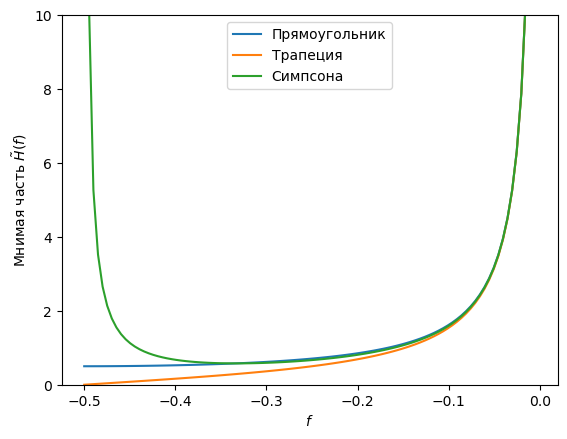

In [3]:
# Определим интервал циклической частоты
df1 = pd.DataFrame({'f': np.linspace(-0.5, 0, 100)})

# Определим функции H
H_rect = lambda f: np.nan if f==0 else np.imag(1 / (2 * 1j * np.sin(np.pi * f)))
H_trap = lambda f: np.nan if f==0 else np.imag(np.cos(np.pi * f) / (2 * 1j * np.sin(np.pi * f)))
H_simp = lambda f: np.nan if f==0 else np.imag((np.cos(2 * np.pi * f) + 2) / (3 * 1j * np.sin(2 * np.pi * f)))

# Применим функции H к ряду
df1['rectangle'] = df1['f'].apply(H_rect)
df1['trapezoid'] = df1['f'].apply(H_trap)
df1['Simpsona'] = df1['f'].apply(H_simp)

# Отрисуем полученный результат
fig, ax = plt.subplots()
ax.set_ylim(0, 10)
sns.lineplot(x='f', y='rectangle', data=df1, ax=ax, label='Прямоугольник')
sns.lineplot(x='f', y='trapezoid', data=df1, ax=ax, label='Трапеция')
sns.lineplot(x='f', y='Simpsona', data=df1, ax=ax, label='Симпсона')
ax.legend()
plt.ylabel('Мнимая часть $\\tilde H(f)$')
plt.xlabel('$f$')
plt.show()

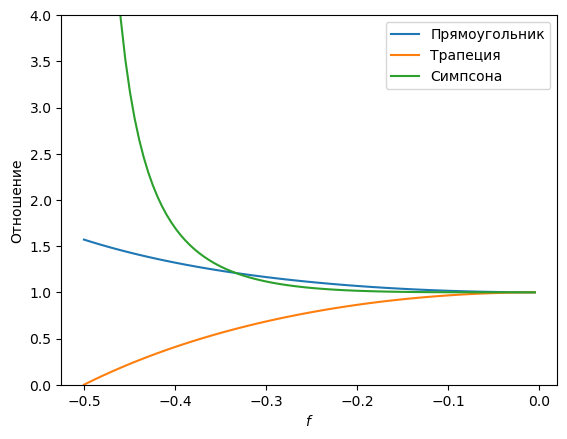

In [ ]:
# Определим интервал циклической частоты
df1 = pd.DataFrame({'f': np.linspace(-0.5, 0, 100)})

# Определим функции отнашения
H_rect = lambda f: np.nan if f==0 else np.pi * f / np.sin(np.pi * f)
H_trap = lambda f: np.nan if f==0 else np.pi * f *np.cos(np.pi * f) / np.sin(np.pi * f)
H_simp = lambda f: np.nan if f==0 else 2 / 3 * np.pi * f * (np.cos(2 * np.pi * f) + 2) / np.sin(2 * np.pi * f)

# Применим функции отнашения к ряду
df1['rectangle'] = df1['f'].apply(H_rect)
df1['trapezoid'] = df1['f'].apply(H_trap)
df1['Simpsona'] = df1['f'].apply(H_simp)

# Отрисуем полученный результат
fig, ax = plt.subplots()
ax.set_ylim(0, 4)
sns.lineplot(x='f', y='rectangle', data=df1, ax=ax, label='Прямоугольник')
sns.lineplot(x='f', y='trapezoid', data=df1, ax=ax, label='Трапеция')
sns.lineplot(x='f', y='Simpsona', data=df1, ax=ax, label='Симпсона')
ax.legend()
plt.ylabel('Отношение')
plt.xlabel('$f$')
plt.show()

<!-- #### Интерпретация частотных свойств передаточных функций для интегрирования по методам прямоугольников, трапеций и Симпсона. -->
#### Cвойства передаточных функций
В итоге об свойствах преедаточных функций можно сказать следующее:
1. **Формула прямоугольников:**
- Пропускает низкие частоты, но на высоких частотах ослабление относительно слабое.
- Частотная характеристика имеет медленно затухающую форму

2. **Формула трапеций:**
- Частотная характеристика демонстрирует лучшее ослабление высокочастотного шума благодаря дополнительному сглаживанию.

3. Ф**ормула Симпсона:**
- Частотная характеристика близка к идеальному низкочастотному фильтру, обеспечивая точное интегрирование для низких частот и сильное ослабление для высоких.


С ростом порядка формулы (от прямоугольников к Симпсону) частотные характеристики улучшаются: повышается точность для низких частот и усиливается подавление высокочастотного шума.

### Задание 2

Вывести формулу передаточной функции рекурсивного фильтра для интегрирования «по правилу 3/8»:  

$$y_{n+2} = y_{n-1} + \frac1{8}(x_{n+2}+3x_{n+1}+3x_{n}+x_{n-1})$$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.


#### Правило 3/8:
Пусть $x_n = e^{i{\omega}n}$, a $y_n = H({\omega})e^{i{\omega}n}$

Тогда:
$$H({\omega})e^{i{\omega}(n+2)} = H({\omega})e^{i{\omega}(n-1)} + \frac{e^{i{\omega}(n+2)} + 3e^{i{\omega}(n+1)} + 3e^{i{\omega}(n)} + e^{i{\omega}(n-1)} }{8}=$$ 
$$= H({\omega})e^{i{\omega}(n-1)} + e^{i{\omega}n}\frac{e^{2i{\omega}} + 3e^{i{\omega}} + 3 + e^{-i{\omega}} }{8}\Rightarrow$$ 
$$\Rightarrow H({\omega})e^{i{\omega}n}e^{2i{\omega}} = H({\omega})e^{i{\omega}n}e^{-i{\omega}} + e^{i{\omega}n}\frac{e^{2i{\omega}} + 3e^{i{\omega}} + 3 + e^{-i{\omega}} }{8}$$ 
$$\Rightarrow H({\omega})(e^{i{\omega}n}e^{2i{\omega}} - e^{i{\omega}n}e^{-i{\omega}}) = e^{i{\omega}n}\frac{e^{2i{\omega}} + 3e^{i{\omega}} + 3 + e^{-i{\omega}} }{8}\Rightarrow$$ 
$$\Rightarrow H({\omega})(e^{2i{\omega}} - e^{-i{\omega}}) = \frac{e^{2i{\omega}} + 3e^{i{\omega}} + 3 + e^{-i{\omega}} }{8} \Rightarrow$$ 
$$\Rightarrow H({\omega}) = \frac{e^{2i{\omega}} + 3e^{i{\omega}} + 3 + e^{-i{\omega}} }{8(e^{2i{\omega}} - e^{-i{\omega}})}=\frac{e^{2i{\omega}} + 3e^{i{\omega}} + 3 + e^{-i{\omega}} }{8(e^{2i{\omega}} - e^{-i{\omega}})}\cdot\frac{e^{-\frac{i\omega}{2}}}{e^{-\frac{i\omega}{2}}}=$$ 
$$= \frac{e^{\frac{3i{\omega}}{2}} + 3e^{\frac{i{\omega}}{2}} + 3e^{-\frac{i{\omega}}{2}} + e^{-\frac{3i{\omega}}{2}} }
{8(e^{\frac{3i{\omega}}{2}} - e^{-\frac{3i{\omega}}{2}})} =\frac{(e^{\frac{3i{\omega}}{2}} + e^{-\frac{3i{\omega}}{2}}) + (3e^{\frac{i{\omega}}{2}} + 3e^{-\frac{i{\omega}}{2}})  }
{8(e^{\frac{3i{\omega}}{2}} - e^{-\frac{3i{\omega}}{2}})} $$ 
$$= \frac{(e^{\frac{3i{\omega}}{2}} + e^{-\frac{3i{\omega}}{2}}) + (3e^{\frac{i{\omega}}{2}} + 3e^{-\frac{i{\omega}}{2}})  }
{8(e^{\frac{3i{\omega}}{2}} - e^{-\frac{3i{\omega}}{2}})} = \frac{\cos{\frac{3\omega}{2}} + 3\cos{\frac{\omega}{2}}  }
{8i\sin{\frac{3\omega}{2}}} =$$ 
$$= \frac{\cos{3{\pi}f} + 3\cos{{\pi}f}  }
{8i\sin{3\pi}f} $$ 
Значение интеграла от $e^{i{\omega}t}$ равняется $\frac{e^{i{\omega}t}}{i\omega}$. Следственно отношения вычисляемого в результате фильтрации значения к истинному считается следующим образом:

$$\gamma = \frac{Вычисленное}{Истинное} = {\omega}\frac{\cos{\frac{3\omega}{2}} + 3\cos{\frac{\omega}{2}}}{8\sin{\frac{3\omega}{2}}} = \frac{1}{12}(\cos(\frac{3\omega}{2})+3\cos(\frac{\omega}{2})) \cdot \frac{\frac{3\omega}{2}}{\sin(\frac{3\omega}{2})}=$$
$$= \frac{1}{12}(\cos(3{\pi}f) + 3\cos({\pi}f))\frac{3{\pi}f}{\sin({3\pi}f)}$$

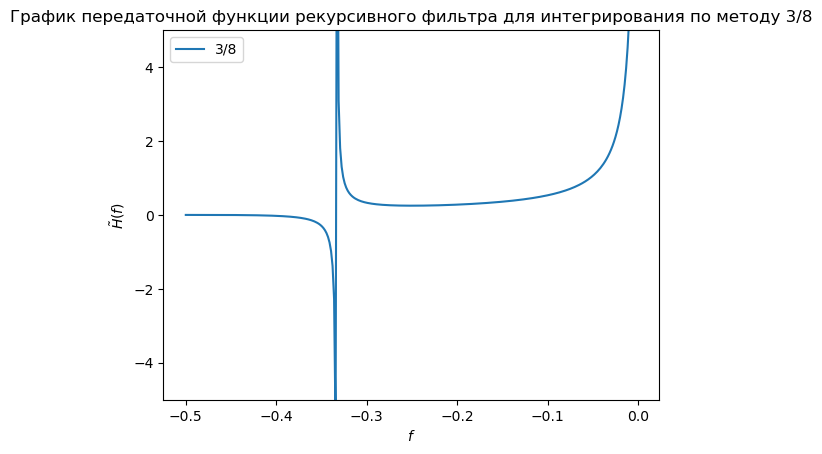

In [31]:
# Определим интервал циклической частоты
df2 = pd.DataFrame({'f': np.linspace(-0.5, 0, 300)})

# Определим функции H
H_3_8 = lambda f: np.nan if f==0 else np.imag((np.cos(3*np.pi*f)+3*np.cos(np.pi*f)) / (8j*np.sin(3*np.pi*f)))

# Применим функции H к ряду
df2['H_3_8'] = df2['f'].apply(H_3_8)

# Отрисуем полученный результат
fig, ax = plt.subplots()
ax.set_ylim(-5,5)
sns.lineplot(x='f', y='H_3_8', data=df2, ax=ax, label='3/8')
ax.legend()
plt.ylabel('$\\tilde H(f)$')
plt.xlabel('$f$')
plt.title('График передаточной функции рекурсивного фильтра для интегрирования по методу 3/8' )
plt.show()

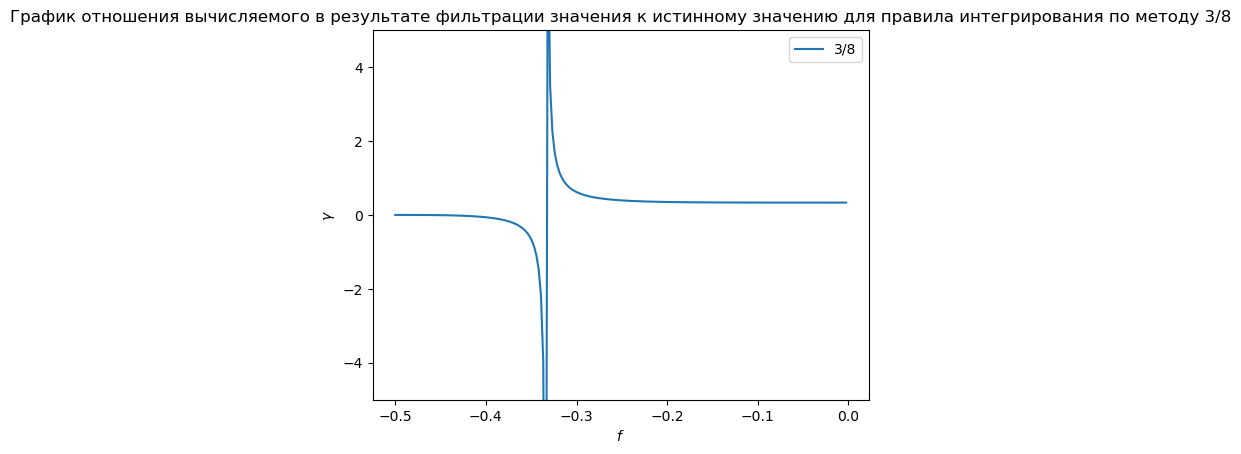

In [32]:
df2 = pd.DataFrame({'f': np.linspace(-0.5, 0, 200)})

# Определим функцию H_3_8
H_3_8 = lambda f: np.nan if f==0 else 1.0/12.0 * (np.cos(3 * np.pi * f) + 3 * np.cos(np.pi * f)) * 3 * np.pi * f / np.sin(3 * np.pi * f)

df2['3_8'] = df2['f'].apply(H_3_8)

# Отрисуем полученный результат
fig, ax = plt.subplots()
ax.set_ylim(-5, 5)
sns.lineplot(x='f', y='3_8', data=df2, ax=ax, label='3/8')
ax.legend()
plt.ylabel('$\\gamma$')
plt.xlabel('$f$')
plt.title('График отношения вычисляемого в результате фильтрации значения к истинному значению для правила интегрирования по методу 3/8' )
plt.show()

#### Cвойства передаточной функции фильра по "правилу 3/8" 

Передаточная функция фильтра для правила 3/8 демонстрирует свойства низкочастотного интегратора, который передает низкочастотные компоненты с высокой точностью и подавляет высокочастотные шумы, обеспечивая сглаживание сигнала.

### Задание 3

Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

### Проведение сопоставительного анализа

1. **Точность на низких частотах:**

* Все фильтры работают как низкочастотные интеграторы, обеспечивая хорошую точность на низких частотах (${\omega}{\rightarrow}0$).

* Формула "3/8" имеет наивысшую точность среди всех, так как использует более сложное взвешивание четырёх точек. Это позволяет лучше аппроксимировать интеграл и уменьшить ошибку даже для плавных сигналов.

* Формулы прямоугольников дают худшую точность на низких частотах, так как используют значение только одной точки, что делает их менее устойчивыми к изменениям сигнала.

2. **Подавление высокочастотного шума:**

* Формулы трапеций, Симпсона и "3/8" эффективно подавляют высокочастотные компоненты благодаря большему количеству используемых точек.

* Формула Симпсона и "3/8" подавляют шум лучше остальных, поскольку включают больше точек с взвешиванием, что сглаживает сигнал.

* Формуула прямоугольников хуже подавляет шум, так как высокочастотные компоненты могут прорываться из-за ее ограниченности.

3. **Сложность частотной характеристики:**

* У формул трапеций и прямоугольников частотная характеристика проста, линейно ослабляющая высокие частоты.

* У формулы Симпсона и особенно "3/8" частотный отклик более сложен, благодаря чему достигается высокая точность и лучшее подавление высокочастотных искажений.

4. **Гладкость фильтрации:**

* "3/8" обеспечивает наиболее плавное и равномерное сглаживание сигнала по сравнению с другими, за счёт использования четырёхточечной схемы.

* Формулы прямоугольников дают более грубую аппроксимацию, что может привести к более заметным ошибкам в случае шумных сигналов.

5. **Итог:**

* Формула "3/8" обладает лучшими частотными характеристиками среди всех рассмотренных методов, обеспечивая точное интегрирование низкочастотных компонентов и эффективное подавление высокочастотного шума.

* Формулы Симпсона и трапеций также показывают хорошие результаты, но уступают в точности на высоких частотах.

* Формулы прямоугольников подходят только для грубых приближений и сильно зависят от структуры сигнала.


## Выводы

В ходе выполнения работы были получены и проанализированы передаточные функции рекурсивных фильтров для различных методов сглаживания временных рядов. Были построены графики амплитудно-частотных характеристик для фильтров, выполняющих усреднение по:
- квадратурным формулам:
    - формула прямоугольников
    - формула трапеций
    - формула Симпсона
- правилу 3/8

Это позволило провести анализ частотных свойств передаточных функций. Вывод этого анализа представлен в задании 3.

